# Analysis of `ArpackMAC` results I:

This notebook includes:
*  examination of the energy spacings and bandagps exhibited by our ensemble of 40x40 MACs
* localisation discrepancy of MOs of these MACs
* localisation analysis of these MOS based on their $\alpha$ parameters
* DOS of 40x40 
* DOS of 10x10 MAC from QCFFPI

Get occupied and virtual frontier MOs and check if they came from the same structures.

In [1]:
%matplotlib widget

from os import path
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from qcnico.coords_io import read_xsf
from qcnico.qcplots import plot_MO
from remove_dangling_carbons import remove_dangling_carbons


datadir = path.expanduser("~/Desktop/simulation_outputs/percolation/40x40")
posdir = path.join(datadir, "structures")
edir = path.join(datadir, 'eARPACK')
Mdir = path.join(datadir,'MOs_ARPACK')

edir_occ = path.join(edir, 'occupied')
edir_vir = path.join(edir, 'virtual')

Mdir_occ = path.join(Mdir, 'occupied')
Mdir_vir = path.join(Mdir, 'virtual')


occ_lbls = np.sort(list(map(int, [f.split('-')[1].split('.')[0] for f in glob(Mdir_occ+'/*npy')])))
vir_lbls = np.sort(list(map(int, [f.split('-')[1].split('.')[0] for f in glob(Mdir_vir+'/*npy')])))

print(occ_lbls.shape)
print(vir_lbls.shape)



# Only work with vir_lbls since not all virtual runs finished, makes it easier to compare

e_arpack_occ = [np.load(edir_occ+f'/eARPACK_bigMAC-{nn}.npy') for nn in vir_lbls] 
e_arpack_vir = [np.load(edir_vir+f'/eARPACK_bigMAC-{nn}.npy') for nn in vir_lbls]

rCC = 1.8

def mos_arpack(Mdir,lbls):
    for nn in lbls:
        yield np.load(Mdir+f'/MOs_ARPACK_bigMAC-{nn}.npy')

def energies_arpack(edir,lbls):
    for nn in lbls:
        yield np.load(edir+f'/eARPACK_bigMAC-{nn}.npy')


def gen_pos(posdir, lbls, rCC):
    for nn in lbls:
        yield remove_dangling_carbons(read_xsf(path.join(posdir,f"bigMAC-{nn}_relaxed.xsf"))[0], rCC)




(300,)
(285,)


Make sure that $E_{HOMO} < E_{LUMO}$ for all MACs.

In [18]:
nlbls = vir_lbls.shape[0]
bandgaps = np.zeros(nlbls)
for k, eoccs, evirts in zip(range(nlbls),e_arpack_occ, e_arpack_vir):
    eHOMO = np.max(eoccs)
    eLUMO = np.min(evirts)
    bandgaps[k] = eLUMO - eHOMO
    print('Nb virt = ', evirts.shape[0])
    print('Nb occ = ', eoccs.shape[0])


print('Number of problematic structures = ', (bandgaps < 0).sum())



Nb virt =  114
Nb occ =  143
Nb virt =  109
Nb occ =  138
Nb virt =  115
Nb occ =  145
Nb virt =  115
Nb occ =  139
Nb virt =  124
Nb occ =  145
Nb virt =  114
Nb occ =  138
Nb virt =  114
Nb occ =  135
Nb virt =  109
Nb occ =  142
Nb virt =  114
Nb occ =  154
Nb virt =  116
Nb occ =  152
Nb virt =  101
Nb occ =  139
Nb virt =  100
Nb occ =  143
Nb virt =  118
Nb occ =  144
Nb virt =  111
Nb occ =  138
Nb virt =  111
Nb occ =  151
Nb virt =  114
Nb occ =  141
Nb virt =  114
Nb occ =  134
Nb virt =  104
Nb occ =  148
Nb virt =  106
Nb occ =  151
Nb virt =  107
Nb occ =  147
Nb virt =  104
Nb occ =  152
Nb virt =  112
Nb occ =  148
Nb virt =  105
Nb occ =  149
Nb virt =  108
Nb occ =  148
Nb virt =  111
Nb occ =  145
Nb virt =  118
Nb occ =  154
Nb virt =  114
Nb occ =  153
Nb virt =  107
Nb occ =  150
Nb virt =  108
Nb occ =  143
Nb virt =  115
Nb occ =  144
Nb virt =  123
Nb occ =  146
Nb virt =  112
Nb occ =  143
Nb virt =  115
Nb occ =  146
Nb virt =  105
Nb occ =  151
Nb virt =  111

Check spacing between adjacent energies for each structure

In [2]:
evenN_lbls = np.load('/Users/nico/Desktop/simulation_outputs/percolation/40x40/MOs_ARPACK/evenN_lbls.npy')
nlbls = evenN_lbls.shape[0]

e_arpack_occ = [np.load(edir_occ+f'/eARPACK_bigMAC-{nn}.npy') for nn in evenN_lbls]
e_arpack_vir = [np.load(edir_vir+f'/eARPACK_bigMAC-{nn}.npy') for nn in evenN_lbls]

occ_diffdata = np.zeros((nlbls,5))
vir_diffdata = np.zeros((nlbls,5))
for k in range(nlbls):
    eoccs = np.sort(e_arpack_occ[k])
    evirts = np.sort(e_arpack_vir[k])
    
    diffs_occ = np.diff(eoccs)
    diffs_virt = np.diff(evirts)

    occ_diffdata[k, 0] = np.mean(diffs_occ) 
    vir_diffdata[k, 0] = np.mean(diffs_virt)

    iocc = np.argsort(diffs_occ) 
    ivirt = np.argsort(diffs_virt) 

    occ_diffdata[k,1] = diffs_occ[iocc[-1]] #max inter-level spacing
    vir_diffdata[k,1] = diffs_virt[ivirt[-1]] #max inter-level spacing
    occ_diffdata[k,2] = diffs_occ[iocc[0]] #min inter-level spacing
    vir_diffdata[k,2] = diffs_virt[ivirt[0]] #min inter-level spacing

    # Relative positions of max/min spacing
    occ_diffdata[k,3] = iocc[-1] / eoccs.shape 
    vir_diffdata[k,3] = ivirt[-1] / evirts.shape
    occ_diffdata[k,4] = iocc[0] / eoccs.shape
    vir_diffdata[k,4] = ivirt[0] / evirts.shape

NameError: name 'occ_diffdata' is not defined

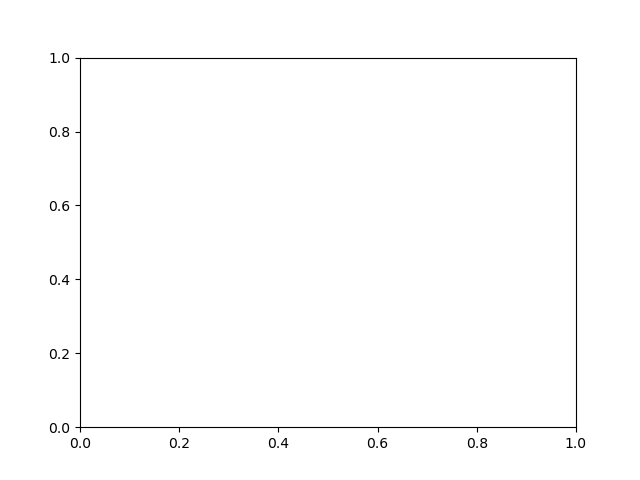

In [3]:
from qcnico.plt_utils import histogram

fig, ax = plt.subplots()

histogram(occ_diffdata[:,0],plt_objs=(fig,ax),plt_kwargs={'color':'b', 'alpha':0.5, 'label':'occupied'},xlabel='Energy spacing [eV]',show=False)
histogram(vir_diffdata[:,0],plt_objs=(fig,ax),plt_kwargs={'color':'r', 'alpha':0.5, 'label':'virtual'},xlabel='Energy spacing [eV]',show=False)
plt.legend()
plt.show()


fig, ax = plt.subplots()

histogram(occ_diffdata[:,1],plt_objs=(fig,ax),plt_kwargs={'color':'b', 'alpha':0.5, 'label':'occupied,max'},xlabel='Energy spacing [eV]',show=False)
histogram(vir_diffdata[:,1],plt_objs=(fig,ax),plt_kwargs={'color':'r', 'alpha':0.5, 'label':'virtual,max'},xlabel='Energy spacing [eV]',show=False)


histogram(occ_diffdata[:,2],plt_objs=(fig,ax),plt_kwargs={'color':'darkorchid', 'alpha':0.5, 'label':'occupied,min'},xlabel='Energy spacing [eV]',show=False)
histogram(vir_diffdata[:,2],plt_objs=(fig,ax),plt_kwargs={'color':'orangered', 'alpha':0.5, 'label':'virtual,min'},xlabel='Energy spacing [eV]',show=False)
plt.legend()
plt.show()

In [2]:
from qcnico.qcplots import plot_MO

eps = 1e-14
sample_inds = vir_lbls[(bandgaps < eps).nonzero()[0][:4]]

for pos, Mocc, Mvir in zip(gen_pos(posdir, sample_inds,rCC),mos_arpack(Mdir_occ,sample_inds), mos_arpack(Mdir_vir,sample_inds)):
    plot_MO(pos,Mocc,-1,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)
    plot_MO(pos,Mvir,0,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)


NameError: name 'bandgaps' is not defined

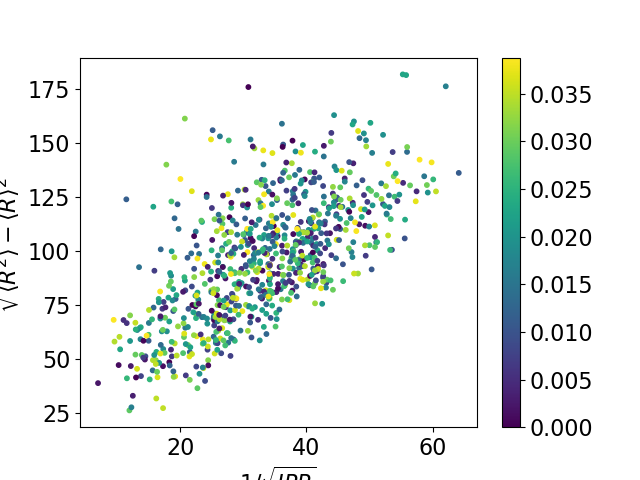

In [5]:

from qcnico.qchemMAC import inverse_participation_ratios, MO_rgyr
from qcnico.qcplots import plot_loc_discrep

fig, ax = plt.subplots()

ns = len(ee)

for k, e, M, pos in zip(range(ns), ee, MM, posarrs):
    e -= e[0]
    iprs = inverse_participation_ratios(M)
    rgyrs = MO_rgyr(pos,M)
    if k == 0:
        plot_loc_discrep(iprs, rgyrs, e, usetex=False, show=False,plt_objs=(fig,ax),show_cbar=True)
    else:
        plot_loc_discrep(iprs, rgyrs, e, usetex=False, show=False,plt_objs=(fig,ax),show_cbar=False)

plt.show()


In [29]:
np.save('vir_lbls.npy', vir_lbls)
natoms = np.zeros(nlbls,dtype='int')
for k, pos in enumerate(gen_pos(posdir, vir_lbls,rCC)):
    natoms[k] = pos.shape[0]

np.save('natoms.npy', natoms)

## Band gap check and verification and occupied/virtual states

In [ ]:
check_files = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/*npy')

check_labels = np.sort([f.split('-')[1].split('.')[0] for f in check_files])

eocc_check = energies_arpack(edir_occ,check_labels)
evir_check = energies_arpack(edir_vir,check_labels)
Mocc_check = mos_arpack(Mdir_occ,check_labels)
Mvir_check = mos_arpack(Mdir_vir,check_labels)
pos_check = gen_pos(posdir,check_labels,rCC)

eps = 1e-10
k = 0

ok = np.zeros(check_labels.shape[0], dtype='bool')# samples for which all obtained virt MOs are virt 
good = np.zeros(check_labels.shape[0], dtype='bool')# samples for which the obtained occupied/virtual states are actually occ/virt
better = np.zeros(check_labels.shape[0], dtype='bool') # samples for which the occ/virt states obtained include the HOMO/LUMO

for i, n, eoccs, evirs, Moccs, Mvirs, pos in zip(range(check_labels.shape[0]),check_labels, eocc_check, evir_check, Mocc_check, Mvir_check, pos_check):
    dN = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/dN-{n}.npy')
    N = pos.shape[0]
    if dN[0] == dN[1]:
        print(f'**** {n} ****')
        sorted_iocc = np.argsort(eoccs)
        sorted_ivir = np.argsort(evirs)

        eoccs = eoccs[sorted_iocc]
        evirs = evirs[sorted_ivir]
        Moccs = Moccs[:,sorted_iocc]
        Mvirs = Mvirs[:,sorted_ivir]
        
        eHOMO = eoccs[-1]
        eLUMO = evirs[0]

        gap = eLUMO - eHOMO

        print(f'eLUMO - eHOMO = {gap} eV')

        if np.abs(gap) < eps:
            print('MO difference = ', np.linalg.norm(Moccs[:,-1] - Mvirs[:,0]))
            if k <= 3:
                k+=1
                plot_MO(pos,Moccs,-1,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)
                plot_MO(pos,Mvirs,0,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)
        print('\n')

    if dN[0] < N/2 and dN[1] >= N/2:
        good[i] = True
        if dN[0] == (N // 2) - 1 and dN[1] == N//2:
            better[i] = True

    if dN[1] >= N/2:
        ok[i] = True

ok_lbls = check_labels[ok]
good_lbls = check_labels[good]
better_lbls = check_labels[better]


Structures with $E_{LUMO} - E_{HOMO} < 10^{-10}$ (i.e. 0 bandgap) have matching frontier orbitals:

$$
E_{LUMO} - E_{HOMO} \approx 0 \implies | \langle\Delta | \Delta \rangle | = 
\begin{cases}
     0 &\iff |\psi_{HOMO}\rangle = |\psi_{LUMO}\rangle \\
     2 &\iff |\psi_{HOMO}\rangle = -|\psi_{LUMO}\rangle\ \\ 
\end{cases}
\,,
$$

where $|\Delta\rangle = |\psi_{HOMO}\rangle - |\psi_{LUMO}\rangle$, and $\langle\psi_{HOMO}|\psi_{HOMO}\rangle = \langle\psi_{HOMO}|\psi_{HOMO}\rangle = 1$.

So that's all good. However we have a whole host of structures for which $\mathcal{N}_{>}(E_{HOMO}) = \mathcal{N}_{>}(E_{LUMO})$ ($\mathcal{N}_{>}(\lambda)\equiv\,$ number of eigenvalues smaller than $\lambda$) but for which $E_{LUMO} - E_{HOMO}\neq 0$. This is problematic. I'll check those out later.

Let's figure out which occupied/virtual MOs I obtained are actually occupied/virtual.

In [3]:
occfiles_check = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/*npy')
lbls_occ_check = np.sort([int(f.split('-')[1].split('.')[0]) for f in occfiles_check])

virtfiles_check = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/*npy')
lbls_virt_check = np.sort([int(f.split('-')[1].split('.')[0]) for f in virtfiles_check])

all_lbls_virt = np.load('vir_lbls.npy')

print(np.all(lbls_occ_check == lbls_virt_check)) #True

Natoms = np.load('natoms.npy')

nHOMO_found = 0
nLUMO_found = 0
nboth_found = 0

occ_starts = np.ones(lbls_virt_check.shape[0], 'int') * -1000
virt_starts = np.ones(lbls_virt_check.shape[0], 'int') * -1000



for k, n in enumerate(lbls_virt_check):
    found_iHOMO = False
    found_iLUMO = False

    print(f'****** {n} ******') 
    odN = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/odN-{n}.npy')
    vdN = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/virtual/vdN-{n}.npy')

    odN = odN
    vdN = vdN

    matching_ind = (all_lbls_virt == n).nonzero()[0]
    N = Natoms[matching_ind]

    Nhalf = N // 2

    odN -= (Nhalf-1)
    occ_inds = (odN <= 0).nonzero()[0]
    occ_starts[k] = np.min(occ_inds)
    print(occ_starts[k])

    vdN -= Nhalf
    virt_inds = (odN >= 0).nonzero()[0]
    virt_starts[k] = np.min(virt_inds)
    print(virt_starts[k])

    print('\n')

print('*********************')
print('Nb of "good" runs (i.e. even number of C atoms) = ',lbls_virt_check.shape[0])
print('Nb of structures for whom all obtained virtual MOs are actually virtual = ',(virt_starts == 0).sum())
print('Nb of structures for whom all obtained occupied MOs are actually occupied = ',(occ_starts == 0).sum())

True
****** 3 ******
2
0


****** 10 ******
2
0


****** 11 ******
2
0


****** 16 ******
2
0


****** 17 ******
2
0


****** 18 ******
1
0


****** 20 ******
2
0


****** 21 ******
2
0


****** 22 ******
1
0


****** 23 ******
2
0


****** 27 ******
2
0


****** 28 ******
2
0


****** 30 ******
1
0


****** 32 ******
2
0


****** 38 ******
1
0


****** 39 ******
2
0


****** 40 ******
2
0


****** 42 ******
2
0


****** 44 ******
2
0


****** 45 ******
2
0


****** 52 ******
2
0


****** 54 ******
2
0


****** 55 ******
1
0


****** 56 ******
1
0


****** 57 ******
2
0


****** 59 ******
1
0


****** 60 ******
2
0


****** 61 ******
2
0


****** 63 ******
2
0


****** 64 ******
1
0


****** 68 ******
2
0


****** 69 ******
2
0


****** 70 ******
2
0


****** 71 ******
2
0


****** 75 ******
2
0


****** 76 ******
2
0


****** 80 ******
1
0


****** 81 ******
1
0


****** 84 ******
2
0


****** 93 ******
1
0


****** 94 ******
2
0


****** 98 ******
2
0


****** 102 ******
1
0


******

All virtual states I obtained are actually virtual. On the other hand, all of the arrays of occupied states I obtained contain at least one virtual MO. From now on, I'm using the 'cleaned occupied and virtual arrays which contain only occupoed and virtual eigenpairs. As a bonus, some the clean virtual arrays contain virtual eigenpairs that were present in the original occupied arrays but absent in the original virtual arrays.

## Energy spacings for extremal MOs

[plt_utils.histogram] dx = 7.09887381465879e-05
[plt_utils.histogram] dx = 7.007002465049539e-05


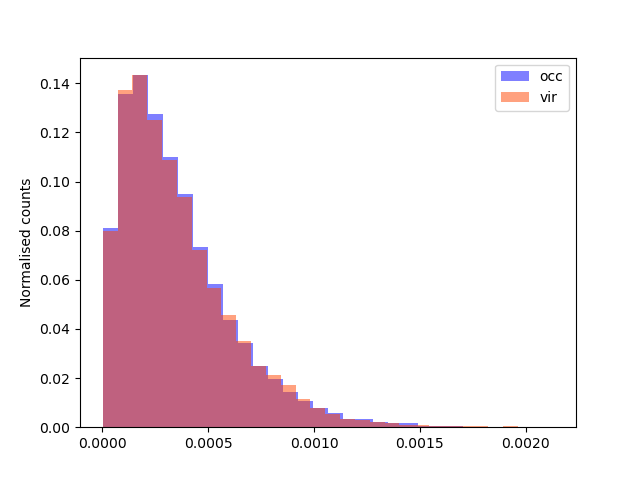

In [4]:
from utils_arpack import plot_energy_spacing_stats

edir_lo = path.join(edir, 'lo')
edir_hi = path.join(edir, 'hi')

fig,ax = plt.subplots()

plot_energy_spacing_stats(edir_occ,evenN_lbls,hist_kwargs={'nbins': 30, 'plt_objs':(fig,ax), 'normalised':True, 'show':False, 'plt_kwargs':{'label':'occ', 'color':'b', 'alpha': 0.5}})
plot_energy_spacing_stats(edir_vir,evenN_lbls,hist_kwargs={'nbins': 30, 'plt_objs':(fig,ax), 'normalised':True, 'show':False, 'plt_kwargs':{'label':'vir', 'color':'orangered', 'alpha': 0.5}})
# plot_energy_spacing_stats(edir_lo,evenN_lbls,filename_template='eARPACK_lo_bigMAC',hist_kwargs={'nbins': 30, 'plt_objs':(fig,ax), 'normalised':True, 'show':False, 'plt_kwargs':{'label':'lo', 'color':'indigo', 'alpha': 0.5}})
# plot_energy_spacing_stats(edir_hi,evenN_lbls,filename_template='eARPACK_hi_bigMAC',hist_kwargs={'nbins': 30, 'plt_objs':(fig,ax), 'normalised':True, 'show':False, 'plt_kwargs':{'label':'hi', 'color':'r', 'alpha': 0.5}})

plt.legend()
plt.show()

In [ ]:
from utils_arpack import gen_energy_spacings

min_ediffs = [np.min(ediffs) for ediffs in gen_ener]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136


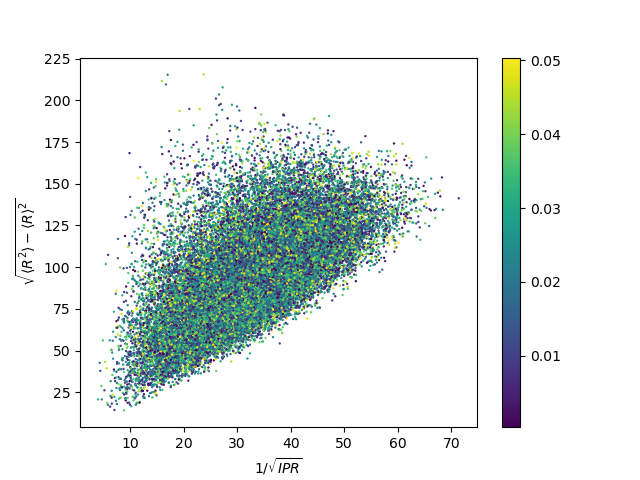

In [5]:
# from qcnico.qcplots import plot_loc_discrep
from qcnico.qchemMAC import inverse_participation_ratios, MO_rgyr
import matplotlib.colors as colors

    


edir_occ = path.join(edir, 'occupied_cleaned')
edir_vir = path.join(edir, 'virtual_cleaned')

Mdir_occ = path.join(Mdir, 'occupied_cleaned')
Mdir_vir = path.join(Mdir, 'virtual_cleaned')

good_eoccs = energies_arpack(edir_occ,lbls_occ_check)
good_Moccs = mos_arpack(Mdir_occ,lbls_occ_check)
good_evirs = energies_arpack(edir_vir,lbls_occ_check)
good_Mvirs = mos_arpack(Mdir_vir,lbls_occ_check)
good_pos = gen_pos(posdir,lbls_occ_check,rCC)

nlbls =lbls_occ_check.shape[0]

fig, ax = plt.subplots()

for k, eoccs, evirs, Mocc, Mvir, pos in zip(range(nlbls),good_eoccs,good_evirs,good_Moccs,good_Mvirs,good_pos):
    print(k)
    ioccs = np.argsort(eoccs)
    ivirs = np.argsort(evirs)

    eoccs = eoccs[ioccs]    
    evirs = evirs[ivirs]

    Mocc = Mocc[:,ioccs]    
    Mvir = Mvir[:,ivirs]

    eF_approx = (eoccs[-1] + evirs[0]) * 0.5 #approximate because the extremal occ/virt energies are not necessarily eHOMO/eLUMO


    energies = np.hstack((eoccs, evirs)) - eF_approx
    M = np.hstack((Mocc, Mvir))

    iprs = 1.0/np.sqrt(inverse_participation_ratios(M))
    rgyrs = MO_rgyr(pos, M)

    if k == 0:
        # ye = ax.scatter(iprs,rgyrs,marker='o',c=energies,s=0.5, cmap='coolwarm', norm = colors.CenteredNorm()) #CenteredNorm sets the midpoint of the colormap to 0
        ye = ax.scatter(iprs,rgyrs,marker='o',c=np.abs(energies),s=0.5, cmap='viridis')
        cbar = fig.colorbar(ye,ax=ax)

    else:
        # ye = ax.scatter(iprs,rgyrs,marker='o',c=energies,s=0.5, cmap='coolwarm', norm = colors.CenteredNorm())
        ye = ax.scatter(iprs,rgyrs,marker='o',c=np.abs(energies),s=0.5, cmap='viridis')

ax.set_ylabel('$\sqrt{\langle R^2\\rangle - \langle R\\rangle^2}$')
ax.set_xlabel('1/$\sqrt{IPR}$')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136


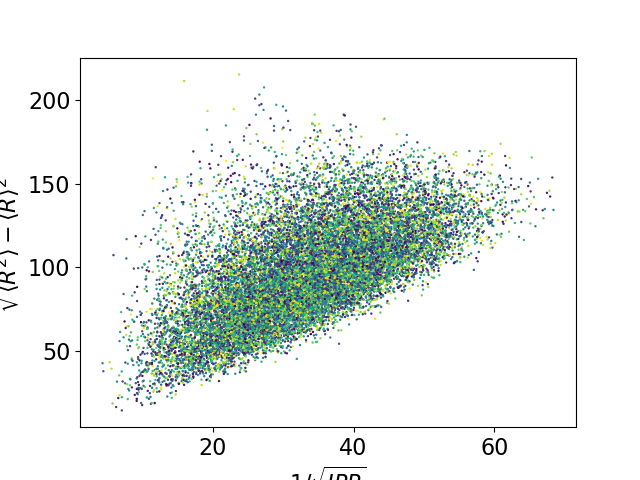

In [31]:
good_eoccs = energies_arpack(edir_occ,lbls_occ_check)
good_Moccs = mos_arpack(Mdir_occ,lbls_occ_check)
good_pos = gen_pos(posdir,lbls_occ_check,rCC)

nlbls =lbls_occ_check.shape[0]

fig, ax = plt.subplots()

for k, eoccs, Mocc, pos, is_occ in zip(range(nlbls),good_eoccs,good_Moccs,good_pos, occ_starts):
    print(k)
    ioccs = np.argsort(eoccs)

    eoccs = eoccs[ioccs]
    eoccs = eoccs[is_occ:]

    Mocc = Mocc[:,ioccs]
    Mocc = Mocc[:,is_occ:]
    
    eHOMO_approx = eoccs[-1] #approximate because the extremal occ/virt energies are not necessarily eHOMO/eLUMO

    eoccs -= eHOMO_approx
    eoccs = np.abs(eoccs)

    iprs_occ = inverse_participation_ratios(Mocc)
    rgyrs_occ = MO_rgyr(pos,Mocc)

    plot_loc_discrep(iprs_occ, rgyrs_occ, eoccs, plt_objs=(fig, ax), usetex=False, show=False,cmap='viridis',show_cbar=False,dotsize=0.5)

plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136


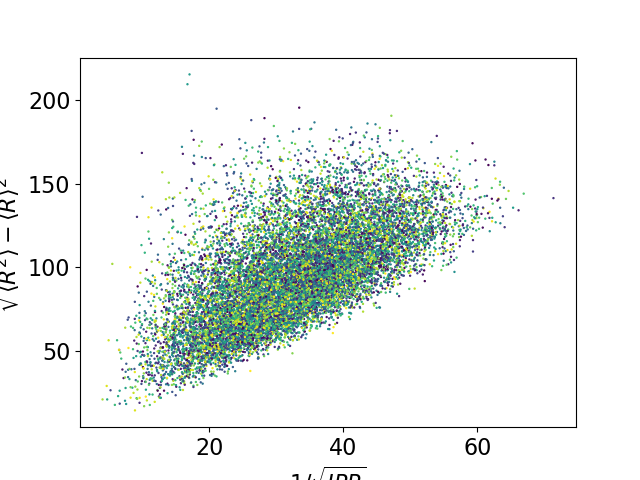

In [33]:

good_evirs = energies_arpack(edir_vir,lbls_occ_check)
good_Mvirs = mos_arpack(Mdir_vir,lbls_occ_check)
good_pos = gen_pos(posdir,lbls_occ_check,rCC)

nlbls =lbls_occ_check.shape[0]

fig, ax = plt.subplots()

for k, evirs, Mvir, pos, is_vir in zip(range(nlbls),good_evirs,good_Mvirs,good_pos, virt_starts):
    print(k)
    ivirs = np.argsort(evirs)

    evirs = evirs[ivirs]
    evirs = evirs[is_vir:]

    Mvir = Mvir[:,ivirs]
    Mvir = Mvir[:,is_vir:]
    
    eLUMO_approx = evirs[0] #approximate because the extremal vir/virt energies are not necessarily eHOMO/eLUMO

    evirs -= eLUMO_approx

    iprs_vir = inverse_participation_ratios(Mvir)
    rgyrs_vir = MO_rgyr(pos,Mvir)

    plot_loc_discrep(iprs_vir, rgyrs_vir, evirs, plt_objs=(fig, ax), usetex=False, show=False,cmap='viridis',show_cbar=False, dotsize=0.5)

plt.show()

## Quest for local exciton ground states (LEGS)

In this section we compute the $\alpha$ parameter (as defined in PHYSICAL REVIEW B, VOLUME 63, 195111) used to determine the 'locality' of a given MO $|\psi\rangle$:
$\alpha (|\psi\rangle) = \left|\sum_{j} \langle \phi_j|\psi\rangle \, |\langle \phi_j|\psi\rangle|\right|\,.$

***** 3 *****
new_vals:  [[3.00000000e+00 6.80000000e+01 3.79719798e-02]
 [3.00000000e+00 3.90000000e+01 3.23542991e-02]
 [3.00000000e+00 4.00000000e+00 2.83660733e-02]
 [3.00000000e+00 1.10000000e+01 2.80818741e-02]
 [3.00000000e+00 5.60000000e+01 2.73886106e-02]]
max_alphas_occ =  [[3.00000000e+00 6.80000000e+01 3.79719798e-02]
 [3.00000000e+00 3.90000000e+01 3.23542991e-02]
 [3.00000000e+00 4.00000000e+00 2.83660733e-02]
 [3.00000000e+00 1.10000000e+01 2.80818741e-02]
 [3.00000000e+00 5.60000000e+01 2.73886106e-02]]
new_vals:  [[3.00000000e+00 1.03000000e+02 5.96744582e-02]
 [3.00000000e+00 6.40000000e+01 4.22775727e-02]
 [3.00000000e+00 8.50000000e+01 3.42984593e-02]
 [3.00000000e+00 6.10000000e+01 3.29302946e-02]
 [3.00000000e+00 3.60000000e+01 3.14532073e-02]]
max_alphas_vir =  [[3.00000000e+00 1.03000000e+02 5.96744582e-02]
 [3.00000000e+00 6.40000000e+01 4.22775727e-02]
 [3.00000000e+00 8.50000000e+01 3.42984593e-02]
 [3.00000000e+00 6.10000000e+01 3.29302946e-02]
 [3.00000000e

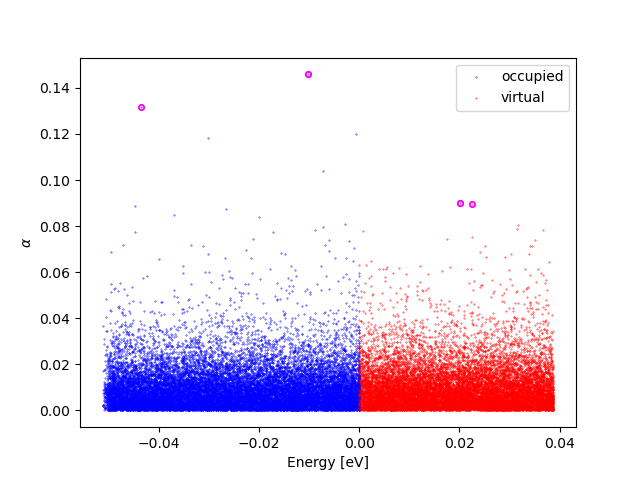

In [2]:
from qcnico.qchemMAC import alpha_LEGS


def update_max_alphas(max_alphas, local_alphas, nstruc):
    iglobal = 0 
    ilocal = 0
    nb_global_maxs = max_alphas.shape[0]

    sorted_local_inds = np.argsort(-local_alphas) #sort in descending order; 1st elem is argmax

    new_vals = np.ones((nb_global_maxs,3)) * -1
    
    while iglobal < nb_global_maxs:
        ii = sorted_local_inds[ilocal]
        check = max_alphas[iglobal,2] < local_alphas[ii]
        if check:
            new_vals[iglobal,:] = np.array([nstruc,ii,local_alphas[ii]])
            ilocal += 1
        iglobal += 1
    
    print('new_vals: ', new_vals)

    changed_global = (new_vals >= 0).nonzero()[0]
    if changed_global.shape[0] > 0:
        # changed_global = changed_global[::-1] #work from the end of the global array, minimizes how many changes need to be done to max_alphas
        for ichange in changed_global:
            if ichange == 0:
                max_alphas = np.roll(max_alphas,1,axis=0)
                max_alphas[0,:] = new_vals[0,:]
            elif ichange < nb_global_maxs - 1 and ichange > 0 :
                unchanged = max_alphas[:ichange,:]
                to_change = np.roll(max_alphas[ichange:,:],1,axis=0)
                to_change[0,:] = new_vals[ichange]
                max_alphas = np.vstack((unchanged,to_change))
            else: # ichange == nb_global_maxs
                max_alphas[ichange,:] = new_vals[ichange,:]
    
    return max_alphas

        
edir_occ = path.join(edir, 'occupied_cleaned')
edir_vir = path.join(edir, 'virtual_cleaned')

Mdir_occ = path.join(Mdir, 'occupied_cleaned')
Mdir_vir = path.join(Mdir, 'virtual_cleaned')

occfiles_check = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/*npy')
lbls_occ_check = np.sort([int(f.split('-')[1].split('.')[0]) for f in occfiles_check])

virtfiles_check = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/*npy')
lbls_virt_check = np.sort([int(f.split('-')[1].split('.')[0]) for f in virtfiles_check])

eoccs = energies_arpack(edir_occ, lbls_occ_check)
Moccs = mos_arpack(Mdir_occ, lbls_occ_check)

evirs = energies_arpack(edir_vir, lbls_occ_check)
Mvirs = mos_arpack(Mdir_vir, lbls_occ_check)

check_pos = gen_pos(posdir, lbls_occ_check, rCC)

fig, ax = plt.subplots()

max_alphas_occ = np.zeros((5,3)) #stores the structure index, state index, and alpha value of occ states w 5 highest alpha in desc order
max_alphas_vir = np.zeros((5,3)) #stores the structure index, state index, and alpha value of vir states w 5 highest alpha in desc order

k = 0
for pos, eocc, evir, Mocc, Mvir in zip(check_pos, eoccs, evirs, Moccs, Mvirs):
    n = lbls_occ_check[k]
    print(f'***** {n} *****')
    # print(n)
    eHOMO = eocc[0] #occupied energies are sorted in descending order
    eocc -= eHOMO
    eocc = eocc[::-1] #reverse order of eocc
    
    eLUMO = evir[0] #vitrual energies are sorted in ascending order 
    evir -= eLUMO 

    # energies = np.hstack((eocc, evir))

    Mocc = Mocc[:,::-1] #reverse order of columns of Mocc
    # M = np.hstack((Mocc, Mvir))

    alphas_occ = alpha_LEGS(Mocc)
    max_alphas_occ = update_max_alphas(max_alphas_occ, alphas_occ, n)
    print('max_alphas_occ = ', max_alphas_occ)

    

    if k == 0:
        ax.scatter(eocc,alphas_occ,c='b',s=0.1,label='occupied')
    else:
        ax.scatter(eocc,alphas_occ,c='b',s=0.1)

    alphas_vir = alpha_LEGS(Mvir)
    max_alphas_vir = update_max_alphas(max_alphas_vir, alphas_vir, n)
    print('max_alphas_vir = ', max_alphas_vir)
    if k == 0:
        ax.scatter(evir,alphas_vir,c='r',s=0.1,label='virtual')
    else:
        ax.scatter(evir,alphas_vir,c='r',s=0.1)
    
    k+=1

ax.set_xlabel('Energy [eV]')
ax.set_ylabel('$\\alpha$')

max_alpha_eoccs = energies_arpack(edir_occ,max_alphas_occ[:,0].astype(int))
max_alpha_evirs = energies_arpack(edir_vir,max_alphas_vir[:,0].astype(int))

for mao, energies in zip(max_alphas_occ, max_alpha_eoccs):
    eHOMO = np.max(energies)
    energies = energies[::-1]
    e = energies[int(mao[1])] - eHOMO
    alpha = mao[2]
    ax.scatter(e,alpha,facecolors=['none'], edgecolors=['fuchsia'],s=15.0)

for mav, energies in zip(max_alphas_vir, max_alpha_evirs):
    eLUMO = energies[0]
    e = energies[int(mav[1])] - eLUMO
    alpha = mav[2]
    ax.scatter(e,alpha,facecolors=['none'], edgecolors=['fuchsia'],s=15.0)

plt.legend()
plt.show()



In [ ]:
print(len(lbls_occ_check))

[ 3 10 11 16 17 18 20 21 22 23]


What do the states with highest $\alpha$ look like?

[157 157 157 221 221]
[ 98  98  98 220 220]


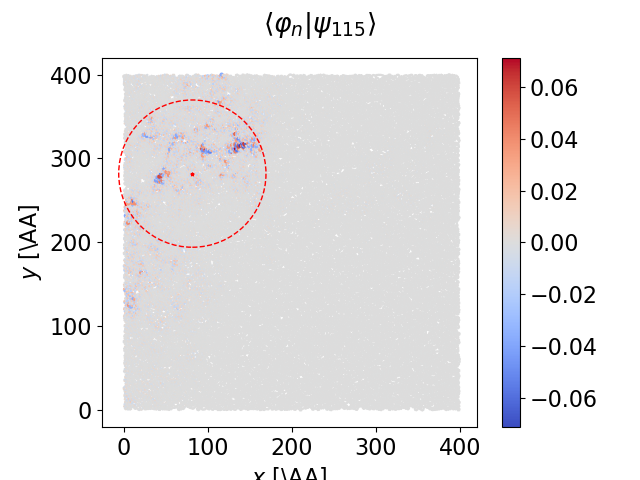

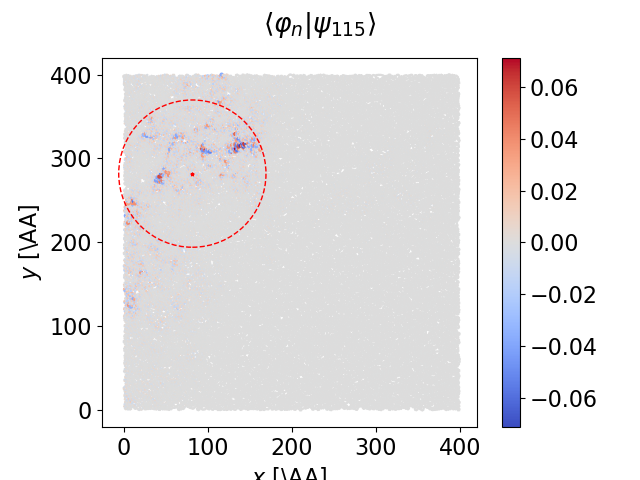

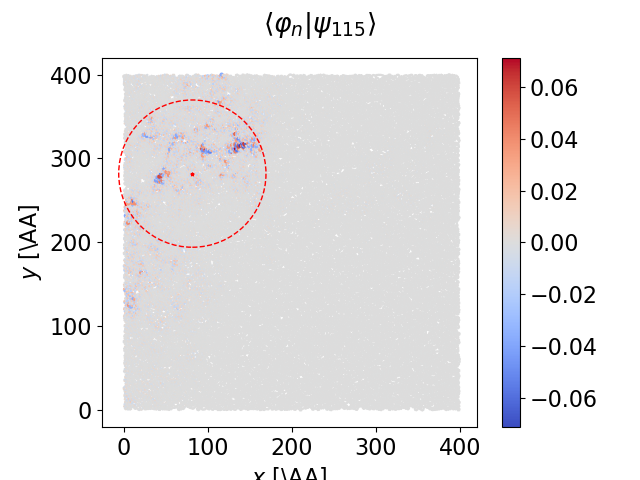

/Users/nico/Desktop/scripts/qcnico/qcnico/qcplots.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


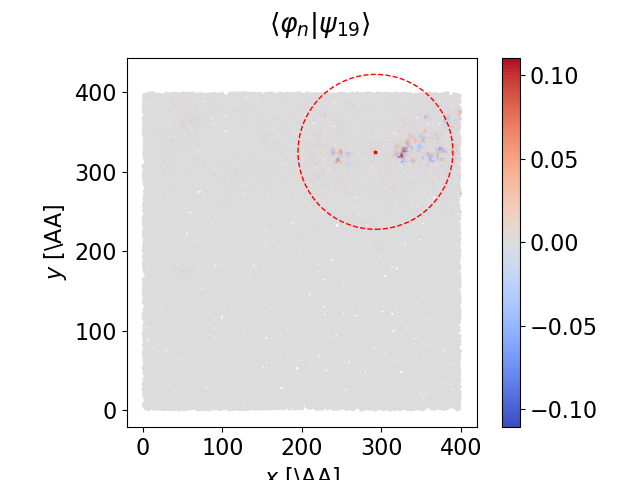

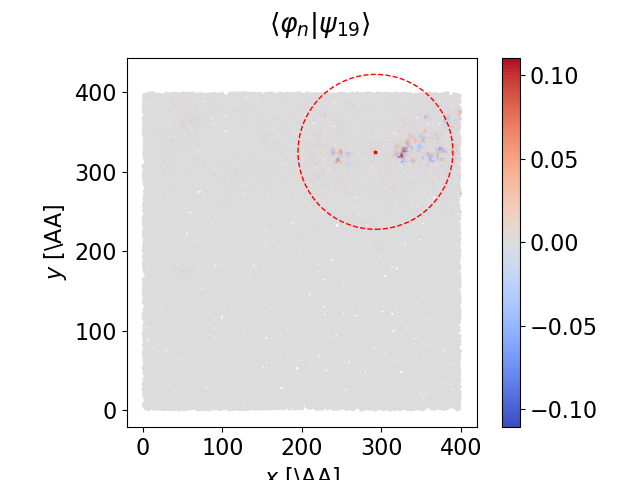

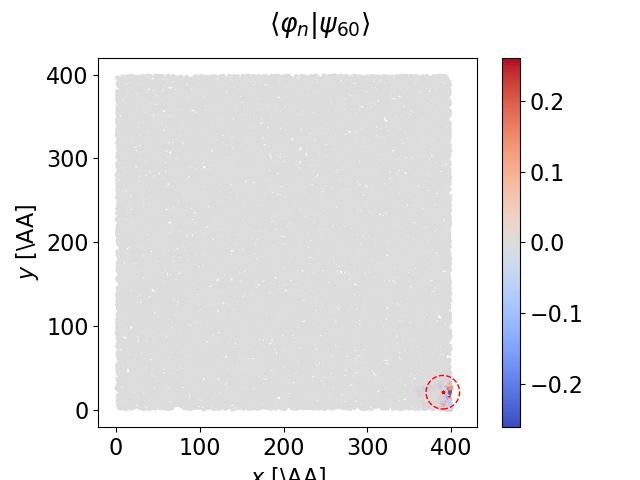

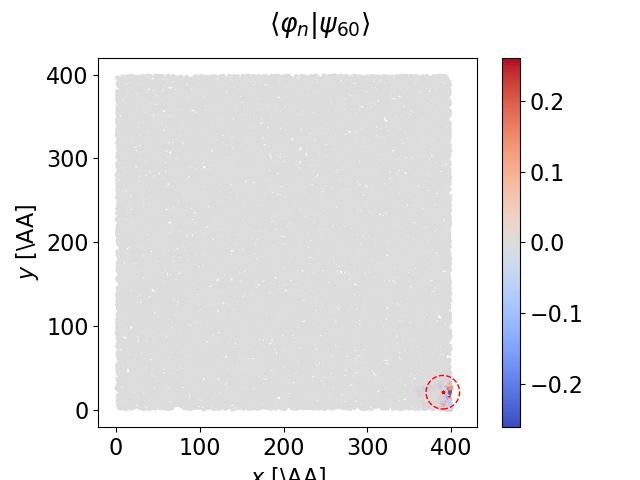

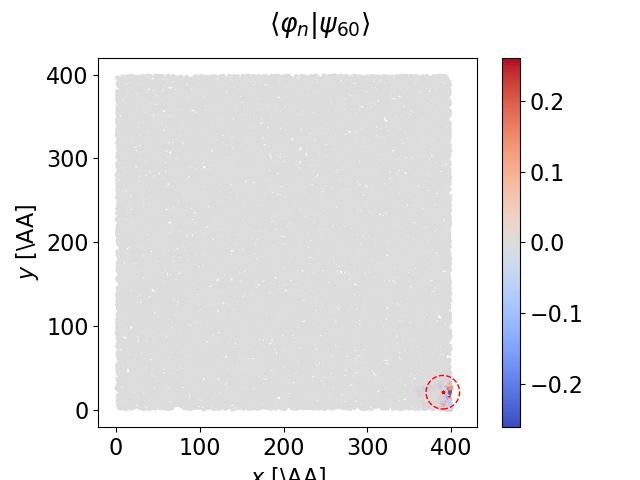

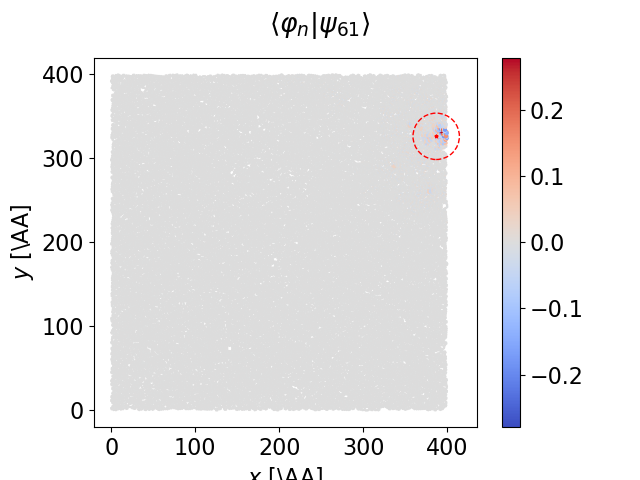

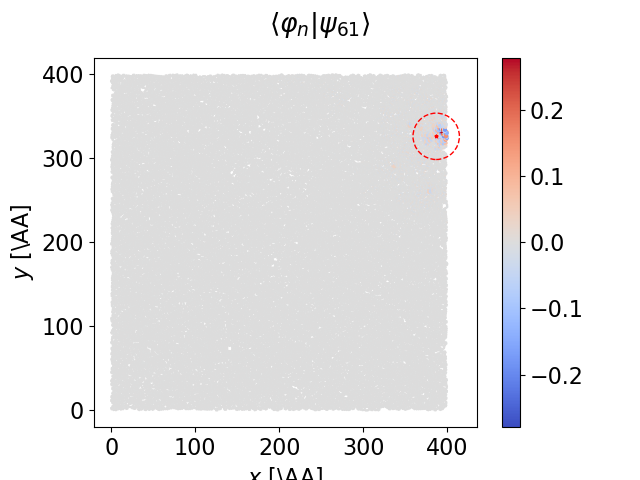

In [5]:
max_alpha_occ_lbls = max_alphas_occ[:,0].astype(int)
aMocc = mos_arpack(Mdir_occ, max_alpha_occ_lbls)
apos_occ = gen_pos(posdir, max_alpha_occ_lbls, rCC)

max_alpha_vir_lbls = max_alphas_vir[:,0].astype(int)
aMvir = mos_arpack(Mdir_vir, max_alpha_vir_lbls)
apos_vir = gen_pos(posdir, max_alpha_vir_lbls, rCC)

print(max_alpha_occ_lbls)
print(max_alpha_vir_lbls)

for mao, M, pos in zip(max_alphas_occ, aMocc, apos_occ):
    iMO = int(mao[1])
    plot_MO(pos,M,iMO,dotsize=0.5,scale_up=8.5,show_COM=True,show_rgyr=True,show=True,usetex=False, plot_amplitude=True,cmap='coolwarm')

for mav, M, pos in zip(max_alphas_vir, aMvir, apos_vir):
    iMO = int(mav[1])
    plot_MO(pos,M,iMO,dotsize=0.5,scale_up=8.5,show_COM=True,show_rgyr=True,show=True,usetex=False, plot_amplitude=True, cmap='coolwarm')

Comparing Boys localised MOs to their "mother" MOs

## ARPACK DOS

/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_1440/985057352.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  shifted_energies_occ = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,edir_lo,edir_hi,lbls_occ_check,'occ'))


/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_1440/985057352.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  shifted_energies_vir = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,edir_lo,edir_hi,lbls_occ_check,'vir'))


[plt_utils.histogram] dx = 0.07230168531028319
[plt_utils.histogram] dx = 0.07415767636110343


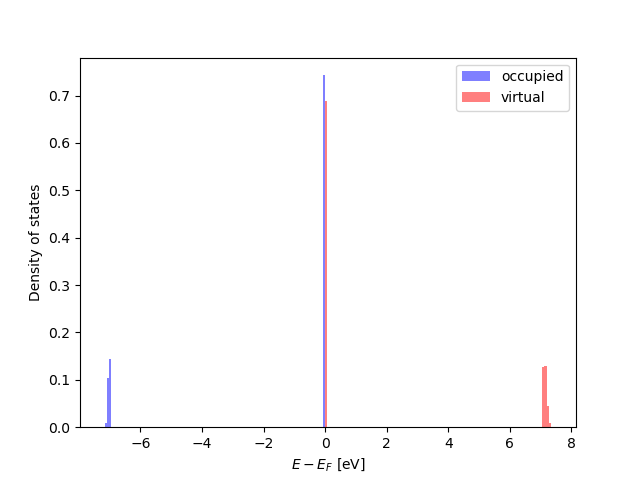

In [7]:
from qcnico.plt_utils import histogram

def shifted_energies_arpack(occdir,virdir,lodir,hidir,lbls,MOtype):
    for n in lbls:
        eocc = np.load(occdir + f'/eARPACK_bigMAC-{n}.npy')
        elo = np.load(lodir + f'/eARPACK_lo_bigMAC-{n}.npy')
        ehi = np.load(hidir + f'/eARPACK_hi_bigMAC-{n}.npy')
        evir = np.load(virdir + f'/eARPACK_bigMAC-{n}.npy')
        eF_approx = (np.max(eocc) + np.min(evir)) * 0.5
        eocc -= eF_approx
        evir -= eF_approx
        elo -= eF_approx
        ehi -= eF_approx
        if MOtype == 'occ':
            eocc = np.hstack((elo,eocc))
            yield eocc
        else:
            evir = np.hstack((evir,ehi))
            yield evir

edir_lo = edir + '/lo'
edir_hi = edir + '/hi'

shifted_energies_occ = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,edir_lo,edir_hi,lbls_occ_check,'occ'))
shifted_energies_vir = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,edir_lo,edir_hi,lbls_occ_check,'vir'))


fig, ax = plt.subplots()

histogram(shifted_energies_occ,normalised=True,plt_objs=(fig,ax),plt_kwargs={'color':'b','alpha':0.5,'label':'occupied'},show=False)
histogram(shifted_energies_vir,normalised=True,plt_objs=(fig,ax),plt_kwargs={'color':'r','alpha':0.5,'label':'virtual'},show=False)
ax.set_xlabel('$E - E_F$ [eV]')
ax.set_ylabel('Density of states')
plt.legend()
plt.show()

/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_17417/3464509034.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  shifted_energies_occ = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,lbls_occ_check,'occ'))
/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_17417/3464509034.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  shifted_energies_vir = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,lbls_occ_check,'vir'))


0.04168353544134201
[plt_utils.histogram] dx = 0.0007941450691237688


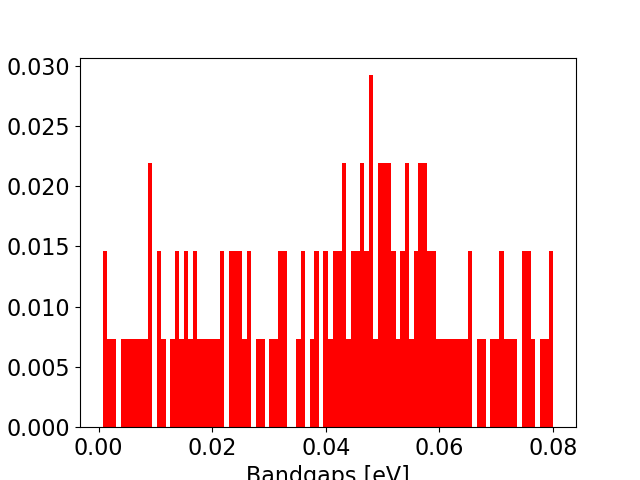

In [10]:
shifted_energies_occ = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,lbls_occ_check,'occ'))
shifted_energies_vir = np.hstack(shifted_energies_arpack(edir_occ,edir_vir,lbls_occ_check,'vir'))

nlbls = len(lbls_occ_check)

gaps = np.zeros(nlbls)

for k, eocc, evir in zip(range(nlbls),shifted_energies_occ, shifted_energies_vir):
    gaps[k] = np.min(evir) - np.max(eocc)

print(np.mean(gaps))

fig, ax = plt.subplots()

histogram(gaps,normalised=True,plt_objs=(fig,ax),xlabel='Bandgaps [eV]',show=True)

[plt_utils.histogram] dx = 0.0011247018461366387


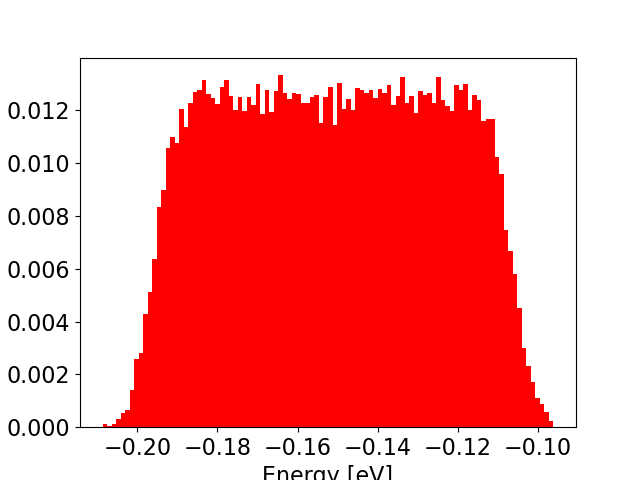

In [29]:

fig, ax = plt.subplots()

all_energies= np.hstack((all_e_occs,all_e_virs))

histogram(all_energies,normalised=True,plt_objs=(fig,ax),show=False)
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Density of states')
plt.show()

## QCFFPI DOS of 10nm $\times$ 10nm pCNN MACs (with identically parametrised tight-binding Hamiltonian)

In [ ]:
def gen_qccfpi_energies(edir,lbls):
    pass